In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

from rent_module import rent_funcs

In [3]:
# записываем даннные в датафрейм объект
df = pd.read_csv('../data/raw/_data.csv')

In [4]:
# Убираем столбец "Unnamed: 0"
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
# работаем с колонками от 11 и дальше
df.iloc[:, 11:]

,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,Евроремонт,NaN,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525


In [6]:
# признак "Ремонт"
df['Ремонт'].unique()

array(['Дизайнерский', 'Евроремонт', 'Косметический', nan, 'Без ремонта'],
      dtype=object)

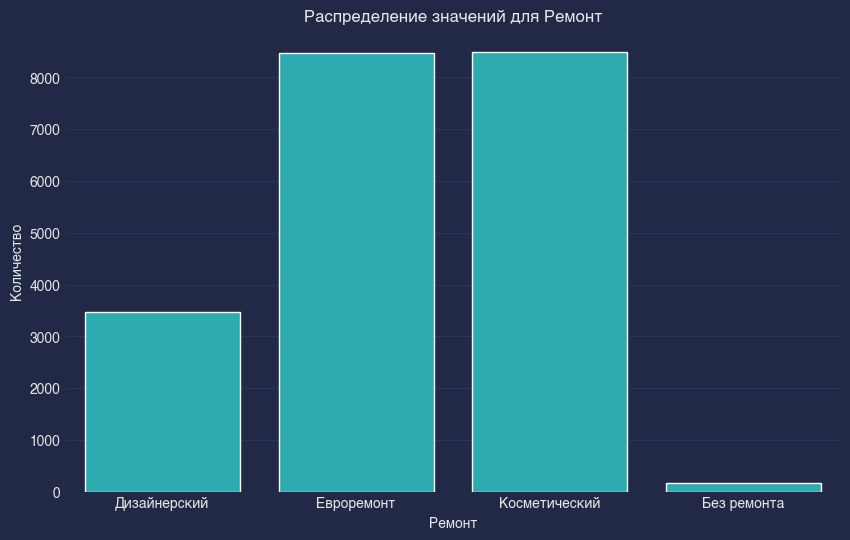

In [8]:
rent_funcs.plot_bar_chart(df, 'Ремонт')

Признак "Ремонт" - категориальный номинальный. Не считая пропуски в наших данных есть 4 вида ремонта - Дизайнерский, Евроремонт, Косметический и без ремонта

In [20]:
# признак Площадь комнат
df.loc[0:20,'Площадь комнат, м2']

0                NaN
1        25 25 20 25
2                NaN
3        14-42-20-19
4              20 18
5                NaN
6     43-25-25-25-22
7           26 22 15
8           45 25 25
9        16 14 16 20
10       16-40-20-18
11               NaN
12                80
13               180
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19    24-22-24-28-64
20             32-18
Name: Площадь комнат, м2, dtype: object

Признак "Площадь комнат" - количественный дискретный. В наших данных имеет все возможные способы записи (через -, +, / и пробел)

In [21]:
# признак Балкон
df['Балкон'].unique()

array([nan, 'Балкон (1)', 'Балкон (3)', 'Лоджия (1)',
       'Балкон (2), Лоджия (3)', 'Балкон (1), Лоджия (1)', 'Балкон (2)',
       'Лоджия (2)', 'Балкон (3), Лоджия (3)', 'Балкон (3), Лоджия (1)',
       'Лоджия (3)', 'Балкон (1), Лоджия (2)', 'Балкон (2), Лоджия (1)',
       'Балкон (2), Лоджия (2)', 'Балкон (1), Лоджия (3)', 'Балкон (4)',
       'Лоджия (4)', 'Балкон (4), Лоджия (4)', 'Балкон (1), Лоджия (4)'],
      dtype=object)